In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [341]:
from tensorflow import keras

In [2]:
### only run once! sets up working directory to be /quality_issue_predictor
import os
os.chdir(os.getcwd()[:-34] + r'\quality_issue_predictor') 

### Purpose:
Generate a model using only the archived shop order data set.  
Why:
    Because currently the shop order data does not intersect with the plantstar data yet.  Using only shop order potentially increases the training size 5-fold from previous model.

In [3]:
archived_df = pd.read_csv('./clean_data/archived_so.csv')
archived_df = archived_df.drop(columns = 'Unnamed: 0')
ncs_df = pd.read_csv('./clean_data/NCs.csv')

In [4]:
archived_df.head()


,Shop Order,Component,MRdate,MQISS,Product,BOM qty,MOPNO,Finished qty,MQREQ,Requested qty,Lot Number,Date
0,186151,RM129,20190422,57534.048,V8536,20.592,20,2794.0,57451.68,2790.0,18M09063,2019-04-22
1,186151,RM093,20190422,0.000,V8536,0.000,20,2794.0,0.00,2790.0,18M09063,2019-04-22
2,186151,RM160,20190422,0.000,V8536,0.000,20,2794.0,0.00,2790.0,18M09063,2019-04-22
3,182831,FS10017466,20190901,0.000,8881907102,0.000,0,120.0,0.00,120.0,18C16263X,2019-09-01
4,182831,EXP6021,20190901,0.000,8881907102,0.000,0,120.0,0.00,120.0,18C16263X,2019-09-01


In [8]:
archived_df[archived_df['Lot Number']=='21F11063']

,Shop Order,Component,MRdate,MQISS,Product,BOM qty,MOPNO,Finished qty,MQREQ,Requested qty,Lot Number,Date
15476,197803,WP8985,20210811,17800.000,8985PG2Y,10.00000,888,1780.0,17820.000,1782.0,21F11063,2021-08-11
15477,197803,RM093,20210809,0.000,8985PG2Y,0.00000,50,1780.0,0.000,1782.0,21F11063,2021-08-09
15478,197803,RM160,20210809,0.000,8985PG2Y,0.00000,50,1780.0,0.000,1782.0,21F11063,2021-08-09
15479,197803,RM157,20210809,0.000,8985PG2Y,0.00000,50,1780.0,0.000,1782.0,21F11063,2021-08-09
15480,197803,RM026,20210809,0.000,8985PG2Y,0.00000,50,1780.0,0.000,1782.0,21F11063,2021-08-09
15481,197803,FS10028181,20210809,0.000,8985PG2Y,0.00000,0,1780.0,0.000,1782.0,21F11063,2021-08-09
15482,197803,RM220,20210809,0.000,8985PG2Y,0.00000,50,1780.0,0.000,1782.0,21F11063,2021-08-09
15483,197803,PT00062563,20210809,2554.201,8985PG2Y,1.43497,0,1780.0,2557.116,1782.0,21F11063,2021-08-09
15484,197803,RM129,20210809,526174.527,8985PG2Y,295.60372,50,1780.0,526765.828,1782.0,21F11063,2021-08-09
15485,197803,R5097,20210811,3560.000,8985PG2Y,2.00000,888,1780.0,3564.000,1782.0,21F11063,2021-08-11


In [241]:

print(archived_df.shape)

(73239, 12)


### One-Hot encoding everything


In [242]:
#remove formula sheets (probably no value)
archived_df = archived_df[(archived_df['Component'].str.contains('FS')==False) & (archived_df['Component'].str.contains('DC')==False)]\
                .reset_index(drop=True)
archived_df.shape

(63698, 12)

In [243]:
archived_df.head()

,Shop Order,Component,MRdate,MQISS,Product,BOM qty,MOPNO,Finished qty,MQREQ,Requested qty,Lot Number,Date
0,186151,RM129,20190422,57534.048,V8536,20.592,20,2794.0,57451.68,2790.0,18M09063,2019-04-22
1,186151,RM093,20190422,0.000,V8536,0.000,20,2794.0,0.00,2790.0,18M09063,2019-04-22
2,186151,RM160,20190422,0.000,V8536,0.000,20,2794.0,0.00,2790.0,18M09063,2019-04-22
3,182831,EXP6021,20190901,0.000,8881907102,0.000,0,120.0,0.00,120.0,18C16263X,2019-09-01
4,182831,PT00004155,20190901,0.000,8881907102,0.000,0,120.0,0.00,120.0,18C16263X,2019-09-01


In [296]:
%%time
df = pd.DataFrame()
for lot, frame in archived_df.groupby('Lot Number'):
    df.loc[lot,frame['Product'].unique()[0]] = 1
    for i,comp in enumerate(frame['Component']):
        frame = frame.reset_index(drop = True)
        if frame.loc[i,'BOM qty']>0:
            df.loc[lot,comp] = 1
df.head()

Wall time: 2min 3s


,8881907102,8881112059,85121,WP8510,RM171,R1246D,R4415,CL63R9869A,PT00006610,8934,...,8612U,RM160,RM157,PT00103021,R7616,8902GSTC,PT00096237,R7032N,RM169,PT00104295
18C16263X,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18C16363X,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18C16463X,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18E20563X,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18E20663X,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [297]:
df =df.fillna(0).reset_index().rename(columns = {'index':'Lot Number'})

In [298]:
print(df.shape)

(5012, 535)


In [299]:
df.head()

,Lot Number,8881907102,8881112059,85121,WP8510,RM171,R1246D,R4415,CL63R9869A,PT00006610,...,8612U,RM160,RM157,PT00103021,R7616,8902GSTC,PT00096237,R7032N,RM169,PT00104295
0,18C16263X,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,18C16363X,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18C16463X,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18E20563X,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18E20663X,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [300]:
%%time
for i, lot in enumerate(df['Lot Number']):
    if lot in ncs_df['Lot Number'].unique():
        df.loc[i,'NC'] = 1
    else:
        df.loc[i,'NC'] = 0

In [301]:
sum(df.NC)

586.0

In [302]:
df.head()

,Lot Number,8881907102,8881112059,85121,WP8510,RM171,R1246D,R4415,CL63R9869A,PT00006610,...,RM160,RM157,PT00103021,R7616,8902GSTC,PT00096237,R7032N,RM169,PT00104295,NC
0,18C16263X,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,18C16363X,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18C16463X,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18E20563X,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18E20663X,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [303]:
X = df.iloc[:,1:-1]

In [304]:
y = df.iloc[:,-1]

In [305]:
sum(y)/len(X)

0.1169193934557063

In [306]:
from sklearn.model_selection import train_test_split

In [307]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)

In [308]:
X_train.shape

(3358, 534)

In [309]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [395]:
rng = np.random.RandomState(1)
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=15, random_state=rng)

In [396]:
%%time
ada_reg.fit(X_train,y_train)

Wall time: 666 ms


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=15,
                  random_state=RandomState(MT19937) at 0x2C8B2AE7440)

In [397]:
y_1 = ada_reg.predict(X_test)

In [398]:
from sklearn.metrics import precision_recall_curve


In [399]:
precision, recall, thresholds = precision_recall_curve(y_test,y_1)

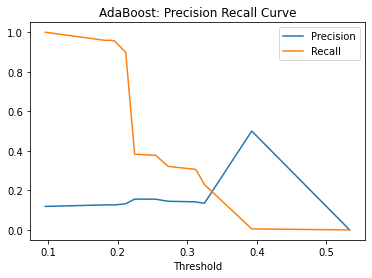

In [400]:
plt.plot(thresholds,precision[:-1],label = 'Precision')
plt.plot(thresholds,recall[:-1],label = 'Recall')
plt.title('AdaBoost: Precision Recall Curve')
plt.xlabel('Threshold')
plt.legend()
plt.show()

In [319]:
recall[1:]

array([0.92346939, 0.91836735, 0.91326531, 0.91326531, 0.91326531,
       0.76020408, 0.76020408, 0.75510204, 0.75      , 0.73979592,
       0.65306122, 0.58163265, 0.57653061, 0.5255102 , 0.52040816,
       0.51530612, 0.51020408, 0.51020408, 0.48469388, 0.46938776,
       0.43367347, 0.43367347, 0.40816327, 0.35204082, 0.35204082,
       0.34183673, 0.33163265, 0.32653061, 0.25510204, 0.03061224,
       0.0255102 , 0.00510204, 0.00510204, 0.00510204, 0.        ])

In [316]:
precision[:-1]

array([0.11885992, 0.12010617, 0.12080537, 0.12110961, 0.12152071,
       0.12491277, 0.1319752 , 0.13256228, 0.13226095, 0.13219424,
       0.13098464, 0.14096916, 0.14485388, 0.14829396, 0.14527504,
       0.14655172, 0.15326252, 0.152207  , 0.1529052 , 0.15447154,
       0.15282392, 0.15370705, 0.15398551, 0.16359918, 0.16235294,
       0.16389549, 0.16028708, 0.15738499, 0.15920398, 0.14084507,
       0.23076923, 0.26315789, 0.25      , 0.5       , 1.        ])

In [317]:
thresholds

array([0.08576118, 0.11538462, 0.125     , 0.14285714, 0.1713555 ,
       0.18696398, 0.1875    , 0.19047619, 0.19230769, 0.2       ,
       0.21672662, 0.22171946, 0.22222222, 0.24113475, 0.24233129,
       0.24358974, 0.25      , 0.25471698, 0.265625  , 0.27272727,
       0.28282828, 0.29411765, 0.31208226, 0.34465617, 0.36      ,
       0.36111111, 0.36363636, 0.36842105, 0.38283063, 0.38809832,
       0.4       , 0.41549537, 0.5       , 0.625     , 0.65625   ])

In [401]:
print(5*'-'+' Balanced Precision and Recall Model '+5*'-')
test_threshold = np.round(0.23076923,4)
print(f'percent of lots indicted = {round(100*len(y_1[y_1>=test_threshold])/len(y_1),2)}%')
print(f'recall (NC reduction) = {round(100*recall[np.where(np.round(thresholds,4) == test_threshold)][0],2)}%')
print(f'total number of predicted NCs = {len(y_1[y_1>=test_threshold])}')
print('True Positives = ')
print(f'precision = {round(100*precision[np.where(np.round(thresholds,4) == test_threshold)][0],2)}%')

----- Balanced Precision and Recall Model -----
percent of lots indicted = 28.78%


IndexError: index 0 is out of bounds for axis 0 with size 0

In [364]:
sum(y_test.iloc[np.where(y_1>0.23076923)[0]])/len(np.where(y_1>0.23076923)[0])

0.14829396325459318

In [ ]:
df.isnull().sum(axis=0)

In [359]:
X_test.iloc[np.where(y_1>0.19)[0]]

,8881907102,8881112059,85121,WP8510,RM171,R1246D,R4415,CL63R9869A,PT00006610,8934,...,8612U,RM160,RM157,PT00103021,R7616,8902GSTC,PT00096237,R7032N,RM169,PT00104295
3192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4457,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
705,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2610,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2186,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [361]:
sum(y_test.iloc[np.where(y_1>0.19)[0]])

149.0

In [348]:
X_test

,8881907102,8881112059,85121,WP8510,RM171,R1246D,R4415,CL63R9869A,PT00006610,8934,...,8612U,RM160,RM157,PT00103021,R7616,8902GSTC,PT00096237,R7032N,RM169,PT00104295
4871,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2894,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4392,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2610,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2186,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [329]:
sum(y_test[np.where(y_1>=test_threshold)])

KeyError: 'key of type tuple not found and not a MultiIndex'

In [338]:
y_test[np.where(y_1>=test_threshold)[0]]

KeyError: '[2, 6, 9, 10, 16, 27, 38, 49, 57, 59, 75, 81, 82, 92, 97, 101, 103, 118, 125, 128, 130, 131, 133, 140, 147, 148, 159, 176, 181, 182, 186, 189, 193, 197, 202, 207, 209, 212, 213, 216, 235, 236, 237, 241, 257, 264, 268, 275, 276, 294, 306, 307, 310, 312, 316, 317, 326, 327, 349, 369, 372, 375, 377, 380, 384, 389, 390, 391, 398, 400, 405, 412, 423, 424, 437, 439, 442, 453, 460, 466, 474, 480, 489, 509, 524, 526, 528, 537, 541, 550, 569, 570, 572, 575, 579, 580, 588, 593, 595, 608, 614, 616, 617, 619, 628, 629, 631, 640, 641, 646, 654, 667, 675, 684, 685, 689, 692, 696, 697, 703, 704, 706, 712, 713, 714, 715, 719, 722, 723, 730, 737, 743, 749, 753, 754, 757, 760, 767, 771, 772, 774, 775, 777, 781, 793, 797, 808, 818, 824, 832, 835, 844, 846, 847, 849, 853, 861, 867, 872, 873, 883, 891, 899, 902, 910, 914, 920, 922, 925, 933, 940, 946, 947, 953, 958, 966, 975, 976, 983, 1000, 1014, 1021, 1030, 1035, 1036, 1045, 1062, 1067, 1069, 1070, 1079, 1086, 1089, 1092, 1093, 1098, 1120, 1121, 1124, 1125, 1132, 1134, 1136, 1139, 1140, 1142, 1191, 1202, 1214, 1216, 1219, 1226, 1229, 1237, 1239, 1243, 1247, 1249, 1254, 1274, 1275, 1277, 1282, 1286, 1294, 1297, 1299, 1304, 1308, 1310, 1317, 1325, 1326, 1328, 1337, 1365, 1368, 1369, 1376, 1377, 1379, 1381, 1383, 1387, 1388, 1400, 1404, 1410, 1411, 1418, 1423, 1445, 1446, 1452, 1454, 1457, 1465, 1468, 1474, 1486, 1490, 1494, 1524, 1544, 1548, 1552, 1559, 1565, 1567, 1571, 1573, 1574, 1577, 1594, 1601, 1605, 1607, 1613, 1627, 1633, 1635, 1637, 1641, 1643, 1653] not in index'

In [325]:
precision[np.where(np.round(thresholds,4) == test_threshold)]

array([], dtype=float64)

In [294]:
sum(y_test[np.where(y_1>=test_threshold)])

KeyError: 'key of type tuple not found and not a MultiIndex'

In [194]:
'21F10563' in df['Lot Number']

False

In [29]:
all_components = set(archived_df.Component)

In [23]:
resins = set()
for component, frame in archived_df.groupby(by = 'Component'):
    if component[0:2] == 'RM':
        resins.add(component)
print(resins)
print(len(resins))

{'RM074', 'RM032', 'RM106', 'RM168', 'RM157', 'RM054', 'RM170', 'RM004', 'RM260', 'RM025', 'RM160', 'RM201', 'RM165', 'RM026', 'RM129', 'RM093', 'RM169', 'RM112', 'RM070', 'RM031', 'RM154', 'RM176', 'RM020', 'RM220', 'RM171'}
25


In [25]:
PTcomponents = set()
for component, frame in archived_df.groupby(by = 'Component'):
    if component[0:2] == 'PT':
        PTcomponents.add(component)
print(PTcomponents)
print(len(PTcomponents))

{'PT00067912', 'PT00006610', 'PT00034306', 'PT00034294', 'PT00067916', 'PT00016495', 'PT00006646', 'PT00015840', 'PT00005525', 'PT00012247', 'PT00013703', 'PT00013702', 'PT00012105', 'PT00075579', 'PT00033969', 'PT00006643', 'PT00006672', 'PT00047930', 'PT00046937', 'PT00016490', 'PT00005149', 'PT00046145', 'PT00034301', 'PT00006659', 'PT00055730', 'PT00012138', 'PT00015631', 'PT00005527', 'PT00015857', 'PT00012137', 'PT00033970', 'PT00062605', 'PT00006674', 'PT00006657', 'PT00068806', 'PT00013696', 'PT00033971', 'PT00075580', 'PT00067917', 'PT00013692', 'PT00006635', 'PT00048792', 'PT00034377', 'PT00067914', 'PT00013699', 'PT00052701', 'PT00055216', 'PT00016498', 'PT00069525', 'PT00006671', 'PT00068683', 'PT00006653', 'PT00012250', 'PT00033972', 'PT00033502', 'PT00096177', 'PT00047934', 'PT00006651', 'PT00044732', 'PT00034305', 'PT00049846', 'PT00067915', 'PT00103021', 'PT00089213', 'PT00013707', 'PT00065942', 'PT00096202', 'PT00065943', 'PT00013694', 'PT00006673', 'PT00065936', 'PT00

In [28]:
FScomponents = set()
for component, frame in archived_df.groupby(by = 'Component'):
    if component[0:2] == 'FS':
        FScomponents.add(component)
print(FScomponents)
print(len(FScomponents))

{'FS10003136', 'FS10026576', 'FS20001166', 'FS10006041', 'FS10003348', 'FS10002892', 'FS10028285', 'FS20003060', 'FS10006161', 'FS10006139', 'FS10003208', 'FS10003206', 'FS10021635', 'FS10003195', 'FS10024556', 'FS10003224', 'FS10003123', 'FS10003745', 'FS10006136', 'FS10002983', 'FS10025555', 'FS10003126', 'FS10023532', 'FS10002829', 'FS10028182', 'FS20001578', 'FS10002898', 'FS10021624', 'FS10002864', 'FS10003176', 'FS10002802', 'FS20002478', 'FS10003188', 'FS10003096', 'FS10029849', 'FS10003172', 'FS10003140', 'FS10006507', 'FS20001169', 'FS10002816', 'FS10026587', 'FS10003095', 'FS10007691', 'FS10003178', 'FS10028280', 'FS10003203', 'FS10002922', 'FS10002872', 'FS10002848', 'FS10002997', 'FS20001513', 'FS10003181', 'FS10028277', 'FS10003217', 'FS10003134', 'FS10002953', 'FS10003741', 'FS10002889', 'FS20001322', 'FS20001163', 'FS10002815', 'FS10026368', 'FS10002875', 'FS10002826', 'FS10002817', 'FS10003174', 'FS10002952', 'FS10007693', 'FS10003699', 'FS10003161', 'FS10003749', 'FS10

In [38]:
CLcomponents = set()
for component, frame in archived_df.groupby(by = 'Component'):
    if component[0:2] == 'CL':
        CLcomponents.add(component)
print(CLcomponents)
print(len(CLcomponents))

{'CL63R1769B', 'CL63R98482', 'CL63R1781', 'CL63R1603', 'CL63R1774', 'CL63R1796', 'CL63R3908', 'CL63R98173', 'CL63R9876B', 'CL63R1146', 'CL63R9828', 'CL63R4445', 'CL63R1782', 'CL63R9962A', 'CL63R1654', 'CL63R1776', 'CL63R1771', 'CL63R98334A', 'CL63R1770A', 'CL63R9960A', 'CL63R1780', 'CL63R98407A', 'CL63R98474A', 'CL63R98355', 'CL63R1773', 'CL63R1778', 'CL63R9881A', 'CL63R1706', 'CL63R98337A', 'CL63R4153', 'CL63R98234', 'CL63R1767A', 'CL63R1768B', 'CL63R1784', 'CL63R98396A', 'CL63R1653', 'CL63R9869A', 'CL63R1794', 'CL63R1777', 'CL63R98211', 'CL63RR98416', 'CL63R98226', 'CL63R1783', 'CL63R98346', 'CL63R98338', 'CL63R9870B', 'CL63R1779', 'CL63R98461A', 'CL63R1040'}
49


In [44]:
Rcomponents = set()
for component, frame in archived_df.groupby(by = 'Component'):
    if (component[0] == 'R') & (component[1]!='M'):
        Rcomponents.add(component)
print(Rcomponents)
print(len(Rcomponents))

{'R7417', 'R1698', 'R98189', 'R9801', 'R98184', 'R7545', 'R9806', 'R5098', 'R9366D', 'R1149', 'R1567', 'R2000', 'R7611', 'R1025D', 'R4415', 'R1705', 'R1320D', 'R7027MW', 'R1293D', 'R7642B', 'R9242D', 'R1690', 'R1679', 'R98405B', 'R4237', 'R98028', 'R7028MW', 'R1246D', 'R8930LA', 'R7046MW', 'R1594', 'R7626', 'R8516-1HB', 'R1333D', 'R98034', 'R1681', 'R1694', 'R8550', 'R7616', 'R98027', 'R1324D', 'R1302D', 'R98180', 'R1292D', 'R3712', 'R1626A', 'R1680', 'R1073D', 'R4395', 'R1378B', 'R1693', 'R1748', 'R7028NMW', 'R98399A', 'R7637', 'R7472', 'R1635A', 'R1156C', 'R1481B', 'R98190', 'R1697', 'R4226A', 'R8535', 'R1471B', 'R7408', 'R5097', 'R1750', 'R1158', 'R1057', 'R98350', 'R1749', 'R8550LGB', 'R9249D', 'R1474', 'R1035', 'R7013', 'R7089W-1', 'R1565B', 'R1300D', 'R1800', 'R1741', 'R98179', 'R8534', 'R7421BL', 'R1695', 'R5104', 'R1644A', 'R1528A', 'R8554B', 'R1704', 'R1160D', 'R1700', 'R1306D', 'R1317D', 'R1338D', 'R1075', 'R1308D'}
97


In [48]:
WPcomponents = set()
for component, frame in archived_df.groupby(by = 'Component'):
    if component[0:2] == 'WP':
        WPcomponents.add(component)
print(WPcomponents)
print(len(WPcomponents))

{'WP8980-C', 'WP8982', 'WP8540', 'WP0003PKG', 'WP7102', 'WP8510', 'WP7417P', 'WP7417', 'WP7445', 'WP8860', 'WP8985', 'WP7026', 'WP7026P', 'WP7450BL', 'WP8986', 'WP7418', 'WP7450BLNB', 'WP7477', 'WP8965U', 'WP8526', 'WP8512U', 'WP8520N', 'WP8964', 'WP8920', 'WP8979', 'WP7409', 'WP7478', 'WP0001PKG', 'WP7483', 'WP7449', 'WP8520N02', 'WP8825', 'WP8836PNB', 'WP7605', 'WP7450', 'WP8965MW', 'WP8520U', 'WP8965N', 'WP8998', 'WP0002PKG', 'WP8836P', 'WP3204', 'WP7417BL', 'WP8935', 'WP7024K', 'WP8850', 'WP4810', 'WP7417BLNB', 'WP8998P', 'WP851201N', 'WP7029N', 'WP3206', 'WP8999'}
53


In [49]:
all_components.difference(FScomponents.union(PTcomponents,resins,CLcomponents,Rcomponents,WPcomponents))

{'0301001',
 '0301009',
 '0400145',
 '0420650',
 '3154021',
 '3201413',
 '4001204',
 '4001801',
 '4006202',
 '4101801',
 '4220125',
 '4230505',
 '4500906',
 '4502575',
 '5000109',
 '5000231',
 '5030483',
 '5151171',
 '5170114',
 '5170406',
 '5170588',
 '5170969',
 '5241005',
 '5241006',
 '5241008',
 '5241008R',
 '5500148',
 '5500149',
 '5510301',
 '5510320',
 '5510509',
 '5542735',
 '7777129656',
 '8507SA',
 'CM285160000',
 'CM285160071',
 'DC00005093',
 'DC00005796',
 'DC00030203',
 'DC00041675',
 'DC00056758',
 'DC00071388',
 'DC00072176',
 'DC00072177',
 'DC00072178',
 'DC00077846',
 'DC00078714',
 'EXP1020',
 'EXP5001',
 'EXP5013',
 'EXP5050',
 'EXP6001',
 'EXP6020',
 'EXP6021',
 'EXP6026',
 'EXP6027',
 'EXP6029',
 'X98140',
 'X98141',
 'X98142',
 'X98146',
 'X98151',
 'X9894',
 'X9898',
 'X9899',
 'X9901'}

In [50]:
archived_df[archived_df['Component'] == '8507SA']

,Unnamed: 0,Shop Order,Component,MRdate,MQISS,Product,BOM qty,MOPNO,Finished qty,MQREQ,Requested qty,Lot Number,Date
3388,3388,188686,8507SA,20190619,69.00,8556H,0.05,20,1380.0,69.00,1380.0,19E16463,2019-06-19
4251,4251,189187,8507SA,20190910,68.40,8556H,0.05,20,1360.0,68.40,1368.0,19G02063,2019-09-10
11384,11384,193921,8507SA,20201013,0.00,8556H,0.05,20,1151.0,57.10,1142.0,20H13263,2020-10-13
22355,22355,188515,8507SA,20190717,69.00,8556H,0.05,20,1449.0,69.00,1380.0,19E08563,2019-07-17
24104,24104,189966,8507SA,20191015,69.00,8556H,0.05,20,1439.0,69.00,1380.0,19H24463,2019-10-15
29384,29384,191573,8507SA,20200602,96.60,8556H,0.05,20,1932.0,96.60,1932.0,20A20463,2020-06-02
37794,37794,187131,8507SA,20190313,0.00,8556H,0.05,20,1256.0,58.65,1173.0,19B22363,2019-03-13
39515,39515,187945,8507SA,20190524,6.40,8556H,0.05,20,128.0,6.40,128.0,19C25863,2019-05-24
44888,44888,190827,8507SA,20200206,72.00,8556H,0.05,20,1412.0,70.60,1412.0,19L10163,2020-02-06
50038,50038,193774,8507SA,20200915,100.05,8556H,0.05,20,2001.0,100.05,2001.0,20H01963,2020-09-15


In [82]:
parts = pd.read_csv(open('./reference_data/parts.csv',encoding = "ISO-8859-1"))
parts = parts[['Number','Description - Long','Lifecycle Phase']][parts['Lifecycle Phase'] == 'Active']\
        .reset_index(drop=True)

In [119]:
for i, description in enumerate(parts['Description - Long']):
    if 'Resin' in description:
        parts.loc[i,'component_type'] = 'Resin'
    if 'Colorant' in description:
        parts.loc[i,'component_type'] = 'Colorant'
    if ('Plunger' in description) or ('PLGR' in description):
        parts.loc[i,'component_type'] = 'Plunger'
    if 'Barrel' in description:
        parts.loc[i,'component_type'] = 'Barrel'
    if ('Videojet' in description) or ('INK'in description.upper()) or ('PAD PRINT' in description.upper()) :
        parts.loc[i,'component_type'] = 'Ink related'
    if ('PURGING' in description.upper()):
        parts.loc[i,'component_type'] = 'Ink related'
    if ('RUBBER TIP' in description.upper()):
        parts.loc[i,'component_type'] = 'Rubber Tip'
    if 'Lid, Scoop, and Door Assembly' in description:
        parts.loc[i,'component_type'] = 'Lid'
    if 'Gasketed Lid' in description:
        parts.loc[i,'component_type'] = 'Lid'
    if 'LID' in description.upper():
        parts.loc[i,'component_type'] = 'Lid'
    if 'Sleeve' in description:
        parts.loc[i,'component_type'] = 'Sleeve'
    if 'COWL & LID' in description:
        parts.loc[i,'component_type'] = 'Lid'
    if 'DOOR' in description.upper():
        parts.loc[i,'component_type'] = 'lid'
    if ('CAP' in description.upper()) and ('SNAP' in description.upper()):
        parts.loc[i,'component_type'] = 'lid'
    if ('CAP' in description.upper()) and ('CHEMO' in description.upper()):
        parts.loc[i,'component_type'] = 'lid'
    

In [120]:
parts[parts['component_type'].isna()]

,Number,Description - Long,Lifecycle Phase,component_type
2,301006,POLYPRO 7824MR,Active,NaN
20,3156002,412 Syringe Assembly Phantom,Active,NaN
37,4220104,"Printing Foil for Hot Stamp Marking, 2.375 Inc...",Active,NaN
38,4220125,"Print Tape, Black, 3 Inch Wide, B215SL",Active,NaN
41,4500005,"Finished Component, MONOJECT 500E Hooded Needl...",Active,NaN
...,...,...,...,...
612,WP7477,Chemotherapy Hood with Printed Instruction Lab...,Active,NaN
613,WP7477NB,"Pharmaceutical, Non Hazardous, Non Biohazard, ...",Active,NaN
619,WP7596,PRINTED TUMBLER FOR GATORGUARD,Active,NaN
667,X9902,"Polybag, 13 Inch x 10 Inch",Active,NaN


In [114]:
def test_word(word):
    for i, description in enumerate(parts['Description - Long']):
        if word in description:
            print(parts.iloc[i])
test_word('CAP')

Number                               EXP1020
Description - Long    Ink, Black, CAPEX 7600
Lifecycle Phase                       Active
component_type                   Ink related
Name: 136, dtype: object
Number                                  PT00033969
Description - Long    Ink, Black, CAPEX 9100 Dense
Lifecycle Phase                             Active
component_type                         Ink related
Name: 210, dtype: object
Number                                                 PT00096237
Description - Long    2GAL FIP SNAP CAP  Sustainable Technologies
Lifecycle Phase                                            Active
component_type                                                NaN
Name: 265, dtype: object
Number                     R7075BR
Description - Long    RED SNAP CAP
Lifecycle Phase             Active
component_type                 NaN
Name: 399, dtype: object
Number                        R7075BY
Description - Long    YELLOW SNAP CAP
Lifecycle Phase                Activ

In [125]:
for comp in all_components:
    if (comp[0:2] == 'FS') or (comp[0:2]=='DC'):
        continue
    if len(parts[parts['Number'] == comp]) == 0:
        print(comp)

WP7417
R7421BL
CL63R98338
R7028MW
R3712
CL63R9828
RM201
7777129656
8507SA
R1338D
R7046MW
4502575
0420650
R1333D
R7408
0301001
WP7409
PT00006672
0400145
R7028NMW
0301009
RM031
